In [1]:
import warnings

import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Pandas: 2.0.3
Numpy: 1.25.2


In [3]:
df_train_csv: pd.DataFrame = pd.read_csv("Dataset/Train.csv")
df_test_csv: pd.DataFrame = pd.read_csv("Dataset/Test.csv")

df_train_csv.info()
df_test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-n

In [4]:
# Concatenate the train and test datasets
df_original = pd.concat([df_train_csv, df_test_csv], axis=0)

# Summarize Dataset Scheme
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [5]:
# Dataset Size
row_count, col_count = df_original.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 10695 rows and 11 columns.


In [6]:
# Check for Duplicate Behavior
print(f"The ID attribute in the original dataset has {df_original['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

The ID attribute in the original dataset has 8363 unique values, and there are 10695 rows in total in the dataset.


In [7]:
# Check to see if they are actually duplicates
# Find duplicate IDs
duplicate_ids = df_original[df_original['ID'].duplicated(keep=False)]

# Sort the DataFrame by the 'ID' column to maintain the original order
sorted_duplicate_ids = duplicate_ids.sort_values(by='ID')

# Print some of the duplicate rows
print(sorted_duplicate_ids.head(100))

# TODO: Why are the numerics differing when the ID and categorical columns are the same???

          ID  Gender Ever_Married  Age Graduated     Profession  \
4977  458989  Female          Yes   42       Yes       Engineer   
0     458989  Female          Yes   36       Yes       Engineer   
6060  458994    Male          Yes   38       Yes     Healthcare   
1     458994    Male          Yes   37       Yes     Healthcare   
7523  458996  Female          Yes   71        No            NaN   
...      ...     ...          ...  ...       ...            ...   
56    459163    Male           No   35       Yes  Entertainment   
1124  459167  Female           No   42       Yes         Artist   
57    459167  Female           No   36       Yes         Artist   
7780  459170  Female           No   36       Yes         Artist   
58    459170  Female           No   35       Yes         Artist   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
4977              1.0            Low          1.0  Cat_6            B  
0                 0.0            Low          1.0  

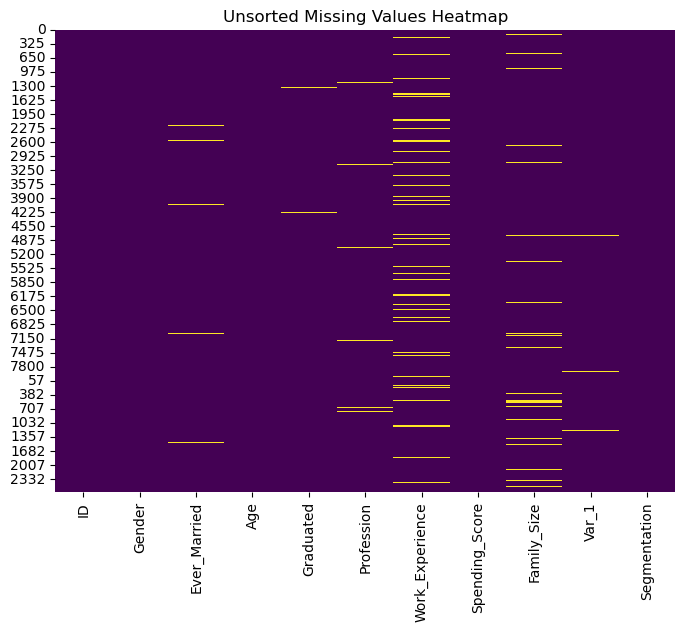

In [10]:
# Exploring Missing Data - ChatGPT 
# Create a boolean DataFrame where True indicates missing values

missing_values = df_original.isnull()

plt.figure(figsize=(8,6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Unsorted Missing Values Heatmap')
plt.show()

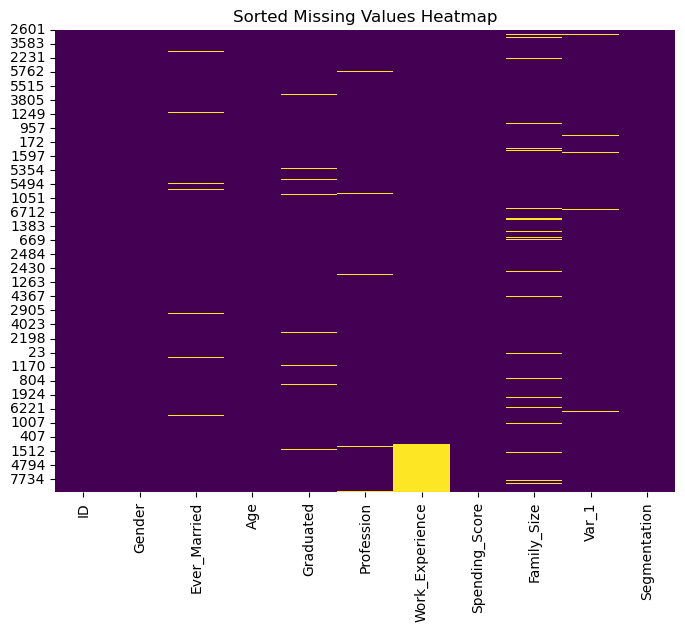

In [11]:
# Sorted by Work Experience
df_sorted_for_nan_transparency = df_original.sort_values(by="Work_Experience")

missing_values_post_sort = df_sorted_for_nan_transparency.isnull()


plt.figure(figsize=(8,6))
sns.heatmap(missing_values_post_sort, cmap='viridis', cbar=False)
plt.title('Sorted Missing Values Heatmap')
plt.show()

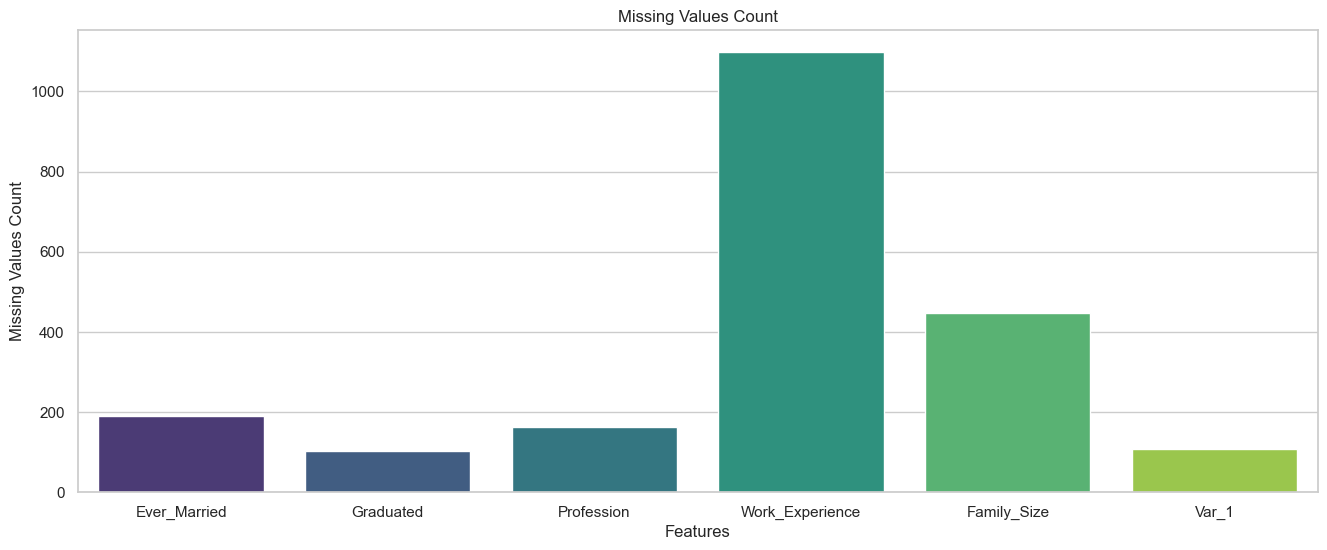

In [12]:
# Bar Plot of missing Values

# Find Missing Values (Sort)
missCount = df_original.isnull().sum()[df_original.isnull().sum() > 0]
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCount.index, y = missCount.values, palette = "viridis")
plt.title('Missing Values Count')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

In [ ]:
# Given the above, we might be tempted to discard Work_Experience
# Leaving it for now, because it kind of shows how long 
# the customer has been commuting to work

In [13]:
# Var_1 is an "Anonymised Category for the customer"
# Get rid of it!!!!
df_modified = df_original

# Yes, I know I left an unecessary for loop
# It's in case I need to remove more columns
for col in ['Var_1']:
    if col in df_modified:
        del df_modified[col]
        
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 919.1+ KB
